# Steam Oyunlarının İncelenmesi: Keşifsel Veri Analizi ve Başarı Sınıflandırması
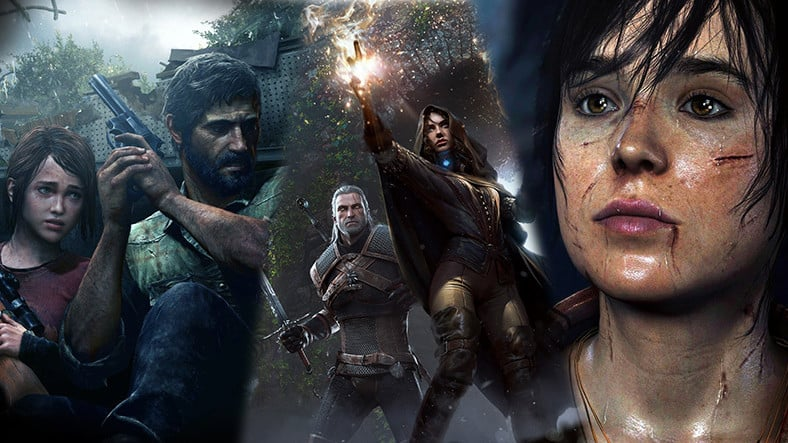

Steam, dünya genelinde milyonlarca oyuncunun buluşma noktası olan en popüler PC oyun platformlarından biridir. Platform, AAA başyapıtlardan küçük bağımsız oyunlara kadar 6,000'den fazla oyuna ev sahipliği yapar. Bu geniş oyun koleksiyonunu daha erişilebilir kılmak için, kullanıcı davranışlarını anlamak ve daha iyi keşif araçları geliştirmek oldukça önemli hale gelmiştir. Bu çalışmada, Steam üzerindeki kullanıcı davranışlarına dair verileri inceleyeceğiz ve bu verileri analiz ederek daha iyi keşif araçları tasarlamak için neler yapabileceğimizi tartışacağız.

Bu analizde kullanacağımız veri seti, Steam kullanıcılarının platform üzerindeki aktivitelerine dayanmakta ve aşağıdaki sütunları içermektedir:

* **User_ID:** Her kullanıcı için benzersiz kimlik numarası.
* **Game:** Oyunların isimleri
* **Action:** Kullanıcının oyun üzerindeki davranışını ifade eder. Bu davranışlar 'purchase' (satın alma) ve 'play' (oynama) olarak iki ana kategoriden oluşur.
* **Hours:** Kullanıcının ilgili oyun için harcadığı saat miktarını gösterir. Eğer 'Action' değeri 'purchase' ise, bu sütunun değeri her zaman 1'dir. 'play' içinse, oyunun ne kadar süre oynandığını belirtir.
* **Other:** Diğer ek bilgileri içerir ancak bu analizde kullanılmayacaktır.

Bu veri seti ile oyunlar arasındaki popülerlik farklılıklarını inceleyerek, kullanıcıların oyun tercihlerini ve oyun oynama ile satın alma davranışları arasındaki ilişkileri derinlemesine analiz edeceğiz. Ayrıca, oyunların oynanma sıklığı, satın alınma oranları ve oyuncuların oyun tercihlerindeki eğilimleri gözlemleyerek, belirli oyunların başarısını etkileyen faktörleri keşfetmeyi amaçlıyoruz. Bu analizler sayesinde, oyunların kullanıcılar üzerindeki etkisini ve oyun pazarındaki dinamikleri daha iyi anlayarak, oyun stratejilerini optimize edebiliriz.

 # 1.  Gerekli kütüphanelerin yüklenmesi

In [256]:
# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# 2.  Veriye ilk bakış

> ## 2.1 Veri setinin yüklenmesi ve eksik değer ataması 

In [257]:
df_ = pd.read_csv('/kaggle/input/steam-video-games/steam-200k.csv')
df = df_.copy()

In [258]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

> ## 2.2 Veri setinin incelenmesi (EDA)

In [259]:
df.head(8)

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712.0,The Elder Scrolls V Skyrim,play,273.0,0.0
1,151603712.0,Fallout 4,purchase,1.0,0.0
2,151603712.0,Fallout 4,play,87.0,0.0
3,151603712.0,Spore,purchase,1.0,0.0
4,151603712.0,Spore,play,14.9,0.0
5,151603712.0,Fallout New Vegas,purchase,1.0,0.0
6,151603712.0,Fallout New Vegas,play,12.1,0.0
7,151603712.0,Left 4 Dead 2,purchase,1.0,0.0


In [260]:
print(df.columns)
# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

Index(['151603712', 'The Elder Scrolls V Skyrim', 'purchase', '1.0', '0'], dtype='object')
Veri seti içerisinde toplam 5 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



Tablomuzu head fonksiyonu ile yazdırdığımızda, veri setindeki sütun isimlerinin eksik veya anlamlı bir şekilde etiketlenmemiş olduğunu fark ediyoruz. Bu durumu, columns fonksiyonu ile sütun isimlerini listeleyerek de doğrulayabiliriz. Bu nedenle öncelikle her bir sütuna daha anlaşılır ve açıklayıcı isimler atayarak veri setini düzenlemeliyiz.

In [261]:
df.columns = ['User_ID', 'Game', 'Action', 'Hours', 'Other']
df.head()

,User_ID,Game,Action,Hours,Other
0,151603712.0,The Elder Scrolls V Skyrim,play,273.0,0.0
1,151603712.0,Fallout 4,purchase,1.0,0.0
2,151603712.0,Fallout 4,play,87.0,0.0
3,151603712.0,Spore,purchase,1.0,0.0
4,151603712.0,Spore,play,14.9,0.0


Burada 'Other' kolonunun değerlerinin hep 0 olarak ilerlediği dikkatimizi çekiyor. Bu durumu daha detaylı bir şekilde kontrol etmek amacıyla, öncelikle sütundaki tüm değerlerin 0 olup olmadığına bakmamız gerektiğini aklımızda bulunduruyoruz. Eğer gerçekten tüm değerler 0 ise, bu sütunun veri setine katkı sağlamadığını ve modelimize herhangi bir bilgi eklemediğini söyleyebiliriz. Böyle bir durumda, bu sütunun analizimize ya da modelimize herhangi bir katkısı olmayacağından sütunu silmek en mantıklı çözüm olabilir.

In [262]:
df.isnull().sum()

User_ID    5844
Game       5916
Action     5811
Hours      6055
Other      5913
dtype: int64

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User_ID  194155 non-null  float64
 1   Game     194083 non-null  object 
 2   Action   194188 non-null  object 
 3   Hours    193944 non-null  float64
 4   Other    194086 non-null  float64
dtypes: float64(3), object(2)
memory usage: 7.6+ MB


Veri setine dair yapılan info() analizinde verimizin toplamda 199999 satır ve 5 sütundan oluştuğunu görüyoruz. Veri seti, 0'dan 199998'e kadar olacak şekilde indislenmiş ve her bir satırda kullanıcı etkileşimlerine dair bilgiler yer alıyor.

Tüm kolonlarda eksik verilerimizin olduğunu görüyoruz ve oranladığımız zaman her sütunda ortalama %2-3 arasında eksik verilerimiz olduğunu söyleyebiliriz. Bu kadar küçük bir oran, modelin genel doğruluğu üzerinde ciddi bir etki yaratmayabilir, ancak her bir sütunun içeriğine göre eksik verileri uygun bir şekilde doldurmak ya da bu satırları çıkarmak gerekebilir.

Veri setindeki User_ID gibi sayısal sütunlar, doğru bir şekilde float64 veri tipiyle tanımlanmış. Fakat, Game ve Action gibi kategorik verileri içeren sütunlar object veri tipiyle ifade edilmiş. 
Game sütununda çok sayıda benzersiz oyun ismi varsa, category veri tipi bellek kullanımını optimize edebilir. Aynı şekilde Action sütunu, kullanıcıların gerçekleştirdiği iki ana eylemi belirtir: "purchase" ve "play". Bu, belirli kategorilere ayrılabilen bir veri olduğundan category veri tipi kullanılması daha mantıklı olabilir. 

Aynı zamanda Hours ve  Action sütunları arasında bir ilişki olduğunu biliyoruz. Hours sütunumuzdaki değer 1 olduğunda Aciton sütunundaki karşılığı 'Purchase', 1 dışında herhangi bir sayı ise de 'Play' olduğundan bahsetmiştik. Bunun tam tersi de geçerli. Bu bilgiyi ileride eksik verileri doldururken kullanabiliriz.


Bu durumları göz önünde bulundurarak, değişken analizi aşamasına geçtiğimizde tüm özellikleri daha ayrıntılı bir şekilde ele alacağız

In [264]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,194155.0,1.036334e+08,7.208308e+07,5250.0,47384202.0,86912006.0,154230933.0,309903146.0
Hours,193944.0,1.783661e+01,1.379687e+02,0.1,1.0,1.0,1.3,11754.0
Other,194086.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


Veri setimizin betimsel istatistiklerini incelediğimizde, User_ID sütununun kullanıcılara atanmış rastgele benzersiz numaralar olduğunu gözlemliyoruz. Bu nedenle, bu sütunun analiz için herhangi bir katkı sağlamadığını söyleyebiliriz.

Other sütununa baktığımızda, tüm değerlerin 0 olduğunu görüyoruz. Bu durum, daha önce düşündüğümüz gibi, sadece 0 ve null değerlerden oluştuğunu teyit ediyor. Bu nedenle, bu sütunun veri analizimize herhangi bir katkısı olmayacaktır.

Geriye yalnızca Hours sütunu kalıyor. Bu sütun, kullanıcıların oyun oynama süreleriyle ilgili bilgi sunuyor. Ortalama değer 17.83 saat olmasına rağmen, yüksek standart sapma ve 11,754 saat gibi aşırı değerler, bazı kullanıcıların oyun süresinin diğerlerinden çok farklı olduğunu gösteriyor. Bu ekstrem değerler, daha derinlemesine bir analiz gerektirebilir ve incelenmesi faydalı olacaktır.

In [265]:
all_zeros = (df['Other'] == 0).all()
print(f"'Other' sütunundaki tüm değerler 0 mı?: {all_zeros}")
if all_zeros == False:
    unique_values = df['Other'].unique()
    print(f"'Other' sütunundaki benzersiz değerler: {unique_values}")


'Other' sütunundaki tüm değerler 0 mı?: False
'Other' sütunundaki benzersiz değerler: [ 0. nan]


In [266]:
missing_values = df['Other'].isnull().sum()
missing_percentage = (missing_values / len(df['Other'])) * 100
print(f"'Other' sütununda eksik değer sayısı: {missing_values}")
print(f"Yüzde olarak: {missing_percentage:.2f}%")

'Other' sütununda eksik değer sayısı: 5913
Yüzde olarak: 2.96%


'Other' sütunumunu tekrardan incelediğimizde, yazdığımız fonksiyon ile, yalnızca 0 ve null değerlerden oluştuğundan emin oluyoruz. Sütunumuzdaki eksik değer sayısına baktığımızda ise 5913 tane kaydımızın eksik olduğunu görüyoruz. Daha önceden verimizin 199999 satırdan oluştuğunu biliyorduk. Bu durumda Verimizin yaklaşık olarak %2.96'sı, yani %3'e yakın bir kısmının Null değerlerden oluştuğunu söyleyebiliriz. Bu, verimizdeki kayıtların büyük bir kısmında eksik olduğuna işaret ediyor. Ancak veride diğer elemanlarımızın hepsinin 0 olduğunu göz önünde bulundurursak bu sütunun anlamlı bir bilgi taşımadığını düşünebiliriz ve bu kısmı veri setimizden çıkartabiliriz

Veri setimizi analiz ederken, kullanıcı bazında bir çalışma yapmaktansa oyunlara odaklanmak bizim için daha anlamlı olacaktır. Bu nedenle, kullanıcıları temsil eden User_ID sütunu verimiz için fazla anlamlı bir bilgi içermiyor. Çünkü asıl ilgi alanımız, oyun adları, satın alınma durumları ve oynanma süreleri gibi unsurlar. Bu yüzden, analizimizi daha net ve odaklı hale getirmek için User_ID sütununu veri setimizden çıkarabiliriz.

Bu değişiklikle, oyun türlerinin popülerliği, oynanma süreleri ve satın alma davranışları arasındaki ilişkileri daha kolay ve doğru bir şekilde analiz edebiliriz.



In [267]:
df.drop(columns = ['Other','User_ID'], inplace = True)

In [268]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var. \n")
print(df.isnull().sum())

Veri seti içerisinde toplam 582215 adet eksik olmayan, 17782 eksik gözlem var. 

Game      5916
Action    5811
Hours     6055
dtype: int64


**Hours** sütunundaki değer **1** ise, bu durumda oyunun satın alındığını biliyoruz ve bu nedenle **Action** sütunundaki değeri '**Purchase**' olarak doldurmalıyız. Eğer **Hours** sütunundaki değer **başka bir sayı** ise (yani oyun oynandıysa), **Action** sütununu '**Play**' olarak doldurmalıyız. Bu şekilde Hours ve Action arasındaki ilişkiyi düzenleyebiliriz.

Action sütununda zaten '**Purchase**' yazıyorsa, bunun anlamı **Hours** sütununun **1** olduğu durumdur. Bu durumda Hours sütunundaki eksik değerleri 1 ile doldurmalıyız. 
Eğer Action sütununda '**Play**' yazıyorsa, bu durumda Hours sütununda belirli bir süre (yani bir sayı) olmalıdır. Eğer bu değer eksikse, belirli bir mantığa göre bu sütun doldurulmalıdır. Eğer eksik veriler önemli bir sorun yaratıyorsa, 0 ile doldurulabilir veya sayıları çok azsa, bu satırlar silinebilir.

**Her iki sütun da eksik olduğunda** ise, verinin hiç bir şekilde kullanılabilir olmayacağını göz önünde bulundurarak, bu satırları silmek en mantıklı çözüm olacaktır.

Play durumu için: Eğer Action sütununda 'Play' değeri bulunuyor ve buna karşılık gelen Hours sütununda eksik (NaN) bir değer varsa, öncelikle her oyun için ayrı ayrı ortalama değerler hesaplanmalıdır. Bu işlem için, her bir oyun ismi için Hours sütunundaki değerlerin ortalaması alınacak ve ardından, eksik değerlere sahip olan satırlara, ilgili oyunun ortalama Hours değeri atanacaktır.

In [269]:
# 'Hours' ve 'Action' sütunlarının her ikisi de null olan satırları seçiyoruz
null_rows = df[df['Hours'].isnull() & df['Action'].isnull()]
null_rows.head()

,Game,Action,Hours
111,Guilty Gear X2 #Reload,NaN,NaN
2997,Arma 2 Operation Arrowhead,NaN,NaN
3767,XCOM Enemy Unknown,NaN,NaN
4134,The Elder Scrolls V Skyrim,NaN,NaN
4793,No More Room in Hell,NaN,NaN


In [270]:
# Her iki sütun da null olan satırları siliyoruz
df.dropna(subset=['Hours', 'Action'], how='all', inplace=True)

In [271]:
df['Action'] = df['Action'].str.lower()
df.loc[(df['Action'].isna()) & (df['Hours'] == 1), 'Action'] = 'purchase'  # Hours == 1 ise Action = 'Purchase'
df.loc[(df['Action'].isna()) & (df['Hours'] != 1), 'Action'] = 'play'  # Hours != 1 ise Action = 'Play'

df.loc[(df['Hours'].isna()) & (df['Action'] == 'purchase'), 'Hours'] = 1  # Action == 'Purchase' ise Hours = 1

display(df.head(20))


,Game,Action,Hours
0,The Elder Scrolls V Skyrim,play,273.0
1,Fallout 4,purchase,1.0
2,Fallout 4,play,87.0
3,Spore,purchase,1.0
4,Spore,play,14.9
5,Fallout New Vegas,purchase,1.0
6,Fallout New Vegas,play,12.1
7,Left 4 Dead 2,purchase,1.0
8,Left 4 Dead 2,play,8.9
9,NaN,purchase,1.0


In [272]:
df.iloc[115:121] 

,Game,Action,Hours
116,Company of Heroes 2,purchase,1.0
117,Fallout New Vegas,purchase,1.0
118,Fallout New Vegas Courier's Stash,purchase,1.0
119,NaN,purchase,1.0
120,Fallout New Vegas Honest Hearts,purchase,1.0
121,Garry's Mod,purchase,1.0


Veri setimizi incelediğimizde, aynı oyun genellikle önce oynanıp sonra satın alındığı için, oyunun ismi alt alta iki satırda yer aldığını fark ediyoruz. Bu bilgiye dayanarak, Game sütunundaki eksik verileri doldurabiliriz.

Eğer **Game** sütunundaki değer **null** ise ve karşısındaki **Action** değeri **purchase** ise, bu durumda Game değerini bir **alt** satırdaki oyun ismiyle doldurmak mantıklı olacaktır. Benzer şekilde, eğer Game sütunundaki değer null ise ve **Action** değeri **play** ise, o zaman Game değerini bir **üst** satırdaki oyun ismiyle doldurmak doğru olacaktır. Bu yöntem, veriyi doğru bir şekilde doldurmamıza yardımcı olacaktır. 

Fakat burada bir sıkıntımız var. Verilerimiz her zaman sırasıyla Play ve Purchase olarak ilerlememektedir. Bazen kullanıcılar, oyunu oynamadan doğrudan satın alabilir ya da oynadıkları oyunu satın almayabilirler. Bu durumda, veriyi kendisinden bir önceki veya sonraki oyunla doldurmak doğru bir çözüm sunmayacaktır. Bu tür durumlarda, bir oyunla ilişkili null değeri varsa ve bu değer iki Play ya da iki Purchase arasındaysa, tahminde bulunmak mümkün olmayacağı için ilgili satırın silinmesi en mantıklı çözüm olacaktır.



In [273]:
# İndeksleri sıralama ve sıfırlama
df = df.reset_index(drop=True)

# Geri yönde döngü başlatma
for idx in range(len(df) - 1, 0, -1):  # Son satırdan başla
    if (df.iloc[idx]['Action'] == 'play' and df.iloc[idx - 1]['Action'] == 'play') or (df.iloc[idx]['Action'] == 'purchase' and df.iloc[idx - 1]['Action'] == 'purchase'):
        if pd.isna(df.iloc[idx]['Game']):  # Bu satırdaki 'Game' NaN mi?
            df.drop(idx, inplace=True)  # NaN olan satırı sil


Daha önce veri silme işlemi gerçekleştirdiğimiz için, kodumuzun index sıralaması değişmişti. Bu nedenle, önce index'leri sıfırlıyoruz ve verilerimizin iki Play veya Purchase arasındaki bir null değeri içerip içermediğini kontrol ediyoruz. Eğer böyle bir durum söz konusuysa, bu satırları silmek istiyoruz. Ancak, index sırasını etkilememek adına bu işlemi tersten yapıyoruz. Bu sayede, index sıralaması bozulmadan veriyi temizlemiş oluyoruz.



In [274]:
# 1. Adım: Eğer 'Action' sütununda 'Play' varsa ve 'Game' sütununda eksik değer varsa, bir üst satırın oyun adını kullan.
df.loc[(df['Action'] == 'play') & (df['Game'].isna()), 'Game'] = df['Game'].ffill()

# 2. Adım: Eğer 'Action' sütununda 'Purchase' varsa ve 'Game' sütununda eksik değer varsa, bir alt satırın oyun adını kullan.
df.loc[(df['Action'] == 'purchase') & (df['Game'].isna()), 'Game'] = df['Game'].bfill()


df['Action'] = df['Action'].astype('category')

In [275]:
display(df.head(15))

,Game,Action,Hours
0,The Elder Scrolls V Skyrim,play,273.0
1,Fallout 4,purchase,1.0
2,Fallout 4,play,87.0
3,Spore,purchase,1.0
4,Spore,play,14.9
5,Fallout New Vegas,purchase,1.0
6,Fallout New Vegas,play,12.1
7,Left 4 Dead 2,purchase,1.0
8,Left 4 Dead 2,play,8.9
9,HuniePop,purchase,1.0


In [276]:
df.iloc[115:121]

,Game,Action,Hours
115,Company of Heroes 2,purchase,1.0
116,Fallout New Vegas,purchase,1.0
117,Fallout New Vegas Courier's Stash,purchase,1.0
119,Fallout New Vegas Honest Hearts,purchase,1.0
120,Garry's Mod,purchase,1.0
121,Killing Floor Mod Defence Alliance 2,purchase,1.0


* Görüldüğü üzere, 9. indeksteki NaN değeri, bir altındaki HuniePop oyunu ile doldurulmuştur.
* Daha öncesinde NaN değerine sahip olan 118. index ise, iki Purchase değeri arasında kaldığı için veriden silinmiştir.



In [277]:
df.isnull().sum()

Game         0
Action       0
Hours     2078
dtype: int64

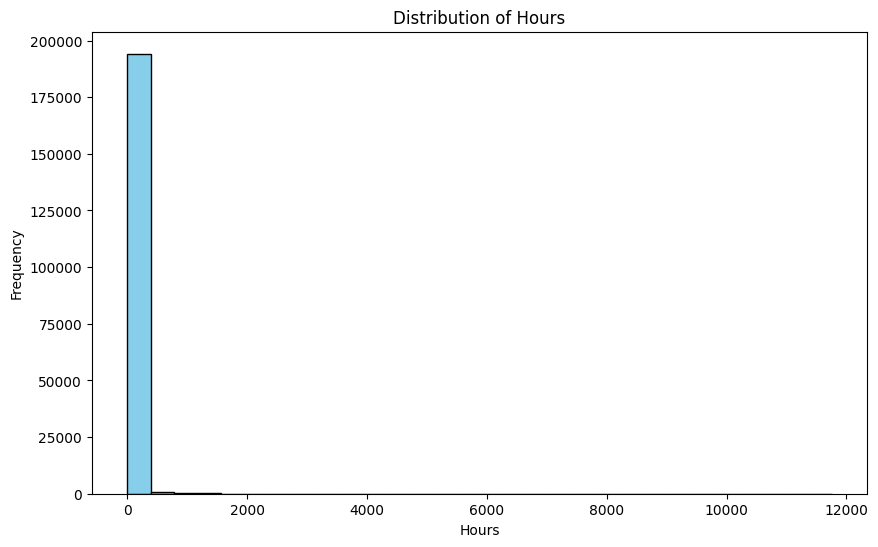

In [278]:
# Genel histogram (tüm oyunlar için)
plt.figure(figsize=(10,6))
plt.hist(df['Hours'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()



Elimizdeki Hours kolonundaki eksik değerleri basitçe tüm oyunların genel ortalamasıyla doldurmak yerine, her oyuna ait verilerde farklı oynama süreleri olabileceği için, oyun ismine göre ortalamalarını hesaplayarak doldurmak daha mantıklı olacaktır. Örneğin, her oyunun Hours değerini o oyun için hesaplanan ortalama (veya median) değerle doldurmak, daha doğru ve anlamlı sonuçlar verecektir.

Çizdirdiğimiz histogram grafiğinde de gözlemlediğimiz gibi, veriler çoğunlukla tek bir değerde yoğunlaşmış. Bu durumu göz önünde bulundurarak, her oyun için Hours değişkeninin modunu alıp, null olan değerlere bu mod değerini atayacağız. Böylece, verinin daha tutarlı bir şekilde doldurulmasını sağlamış olacağız.

In [279]:
# Her oyun için mode (mod) değerini hesapla
game_avg_hours = df.groupby('Game', observed=False)['Hours'].apply(lambda x: x.mode()[0] if not x.mode().empty else x.mean())

# Hours sütunundaki NaN değerlerini, ilgili Game'in mod değeriyle doldur
df['Hours'] = df['Hours'].fillna(df['Game'].map(game_avg_hours))


In [280]:
df.isnull().sum()

Game      0
Action    0
Hours     0
dtype: int64

Sonuç olarak, tüm eksik verileri temizlemiş olduk.

# 3. Verilerin Analizi ve Görselleştirilmesi

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198087 entries, 0 to 199854
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Game    198087 non-null  object  
 1   Action  198087 non-null  category
 2   Hours   198087 non-null  float64 
dtypes: category(1), float64(1), object(1)
memory usage: 8.8+ MB


In [282]:
df.Game.nunique()

5130

> ## 3.1 Oyunlar

> ### En uzun süre oynanan oyunlar

In [283]:
df_play = df.loc[df['Action'] == 'play']
hours_played = df_play.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})
hours_played.head(10)

/tmp/ipykernel_30/289040362.py:2: FutureWarning: The provided callable <function sum at 0x7e3b1852cee0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hours_played = df_play.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)


,game,hours_played
0,Dota 2,940486.0
1,Counter-Strike Global Offensive,312849.9
2,Team Fortress 2,169174.6
3,Counter-Strike,130954.1
4,Sid Meier's Civilization V,99731.7
5,Counter-Strike Source,95040.8
6,The Elder Scrolls V Skyrim,68553.6
7,Garry's Mod,49271.5
8,Call of Duty Modern Warfare 2 - Multiplayer,41443.4
9,Left 4 Dead 2,32790.0


/tmp/ipykernel_30/3707480497.py:5: FutureWarning: The provided callable <function sum at 0x7e3b1852cee0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hours_played = df_play.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)


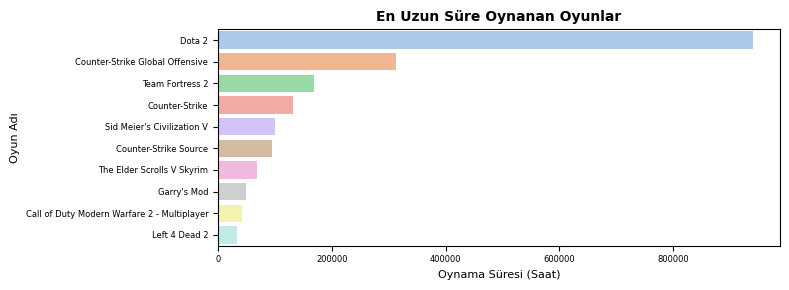

In [284]:
# Number of games to display
nb_games = 10

# Data preparation
hours_played = df_play.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_games]

fig, ax = plt.subplots(figsize=(8, 3))

# Set a pastel color palette
sns.set_palette("pastel")

# Plot for the played hours
sns.barplot(x='hours_played', y='game', data=hours_played, ax=ax)

# Add title and labels
ax.set_title('En Uzun Süre Oynanan Oyunlar', fontsize=10,  fontweight='bold')
ax.set_xlabel('Oynama Süresi (Saat)', fontsize=8)
ax.set_ylabel('Oyun Adı', fontsize=15) 

# Adjusting axis and font sizes
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
ax.xaxis.label.set_size(8)
ax.yaxis.label.set_size(8)

# Show the plot
plt.tight_layout()
plt.show()


**Dota 2'nin Üstünlüğü:** Bu grafikte Dota 2'nin açık ara lider olduğunu görüyoruz. Bu oyun, diğerlerine kıyasla çok daha fazla saat boyunca oynanmış, bu da Dota 2'nin yüksek bir bağımlılık seviyesi yarattığını ve oyuncuların sürekli olarak bu oyunu oynadığını gösteriyor.

**Counter-Strike Serisi:** İlk 10'da Counter-Strike serisinden üç oyun var: CS:GO, Counter-Strike ve Counter-Strike Source. Bu da Counter-Strike oyunlarının çok popüler olduğunu ve farklı versiyonlarının bile büyük bir oyuncu kitlesine sahip olduğunu gösteriyor.

> ### En çok satın alınan oyunlar

In [285]:
df_purchase = df.loc[df['Action'] == 'purchase']
purchased_times = df_purchase.groupby('Game')['Game'].agg('count').sort_values(ascending=False)
purchased_times = pd.DataFrame({'game': purchased_times.index, 'purchased_times': purchased_times.values})
purchased_times.head()

,game,purchased_times
0,Dota 2,4799
1,Team Fortress 2,2318
2,Unturned,1551
3,Counter-Strike Global Offensive,1403
4,Half-Life 2 Lost Coast,964


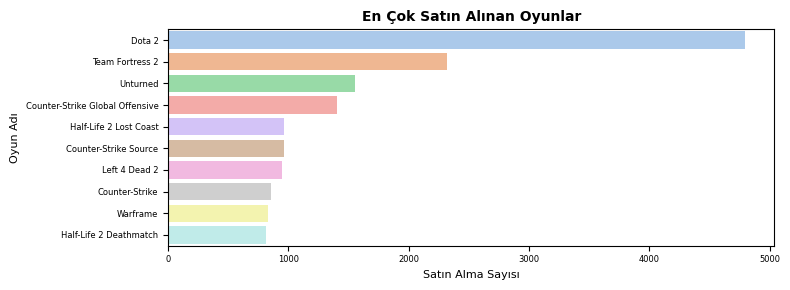

In [286]:
# Number of games to display
nb_games = 10

# Data preparation for purchased games
purchased_times = df_purchase.groupby('Game')['Game'].agg('count').sort_values(ascending=False)
purchased_times = pd.DataFrame({'game': purchased_times.index, 'purchased_times': purchased_times.values})[0:nb_games]

# Plot for purchased times
fig, ax = plt.subplots(figsize=(8, 3))

# Set a pastel color palette
sns.set_palette("pastel")

# Plot the barplot for purchased times
sns.barplot(y='game', x='purchased_times', data=purchased_times, ax=ax)

# Set title and labels
ax.set_title('En Çok Satın Alınan Oyunlar', fontsize=10, fontweight='bold') 
ax.set_xlabel('Satın Alma Sayısı', fontsize=8) 
ax.set_ylabel('Oyun Adı', fontsize=8) 

# Adjust axis and font sizes
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
ax.xaxis.label.set_size(8)
ax.yaxis.label.set_size(8)

# Show the plot
plt.tight_layout()
plt.show()


**Dota 2'nin Satış Liderliği:** Yine, Dota 2 bu kategoride de birinci sırada yer alıyor. Bu oyunun satın alımlarının yüksek olması, hem yeni oyuncuların ilgisini çektiğini hem de mevcut oyuncuların hesaplarını yükseltmek için ekstra satın alımlar yapma olasılığını gösteriyor.

**Free-to-Play Oyunların Popülerliği:** Team Fortress 2 ve Unturned gibi oyunlar genellikle ücretsiz olmasına rağmen, oyun içi satın alımlar veya DLC (indirilebilir içerik) satın almaları sayesinde yüksek satın alma sayısına sahip olabilir. Bu, free-to-play oyunların nasıl karlı hale gelebileceğini gösterir.

**CS:GO'nun Kalıcılığı:** Counter-Strike Global Offensive’in de bu listede yer alması, oyunun yıllar boyunca süregelen popülerliğini kanıtlıyor.

> ### En çok oynanan oyunlar

In [287]:
play_count = df[df['Action'] == 'play'].groupby('Game').size().sort_values(ascending=False)
play_count = pd.DataFrame({'game': play_count.index, 'play_count': play_count.values})
play_count.head(10)

,game,play_count
0,Dota 2,4833
1,Team Fortress 2,2317
2,Counter-Strike Global Offensive,1377
3,Unturned,1070
4,Left 4 Dead 2,800
5,Counter-Strike Source,714
6,The Elder Scrolls V Skyrim,675
7,Garry's Mod,666
8,Counter-Strike,568
9,Sid Meier's Civilization V,555


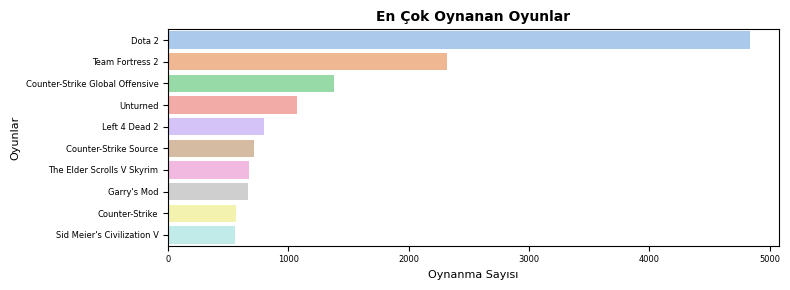

In [288]:
# Number of games to display
nb_games = 10

#Data preparation
play_count = df[df['Action'] == 'play'].groupby('Game').size().sort_values(ascending=False)
play_count = pd.DataFrame({'game': play_count.index, 'play_count': play_count.values})[0:nb_games]

fig, ax = plt.subplots(figsize=(8, 3))

# Set a pastel color palette
sns.set_palette("pastel")

# Plot for the played hours
sns.barplot(x='play_count', y='game', data=play_count, ax=ax)

# Add title and labels
ax.set_title('En Çok Oynanan Oyunlar', fontsize=10, fontweight='bold')
ax.set_xlabel('Oynanma Sayısı', fontsize=8)
ax.set_ylabel('Oyunlar', fontsize=15) 

# Adjusting axis and font sizes
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)
ax.xaxis.label.set_size(8)
ax.yaxis.label.set_size(8)

# Show the plot
plt.tight_layout()
plt.show()

**Dota 2'nin Devam Eden Popülaritesi:** Yine, Dota 2 en çok oynanan oyun olarak zirvede. Bu, sadece uzun süre oynanan değil, aynı zamanda sık sık başvurulan bir oyun olduğunu gösteriyor.

**Free-to-Play Oyunların Sık Oynanması:** Team Fortress 2 ve Unturned, özellikle sık oynanan oyunlar arasında. Ücretsiz oyunların erişilebilirliği, oyuncu kitlesinin geniş olmasını sağlıyor.

**FPS Oyunlarının Gücü:** Counter-Strike serisinden üç oyun, ilk 10'da yer alıyor. Bu, FPS türünün oyuncular arasındaki kalıcı popülerliğini gösteriyor.

> ## 3.2 İlişkileri inceleme

> ### Genel Görünüm

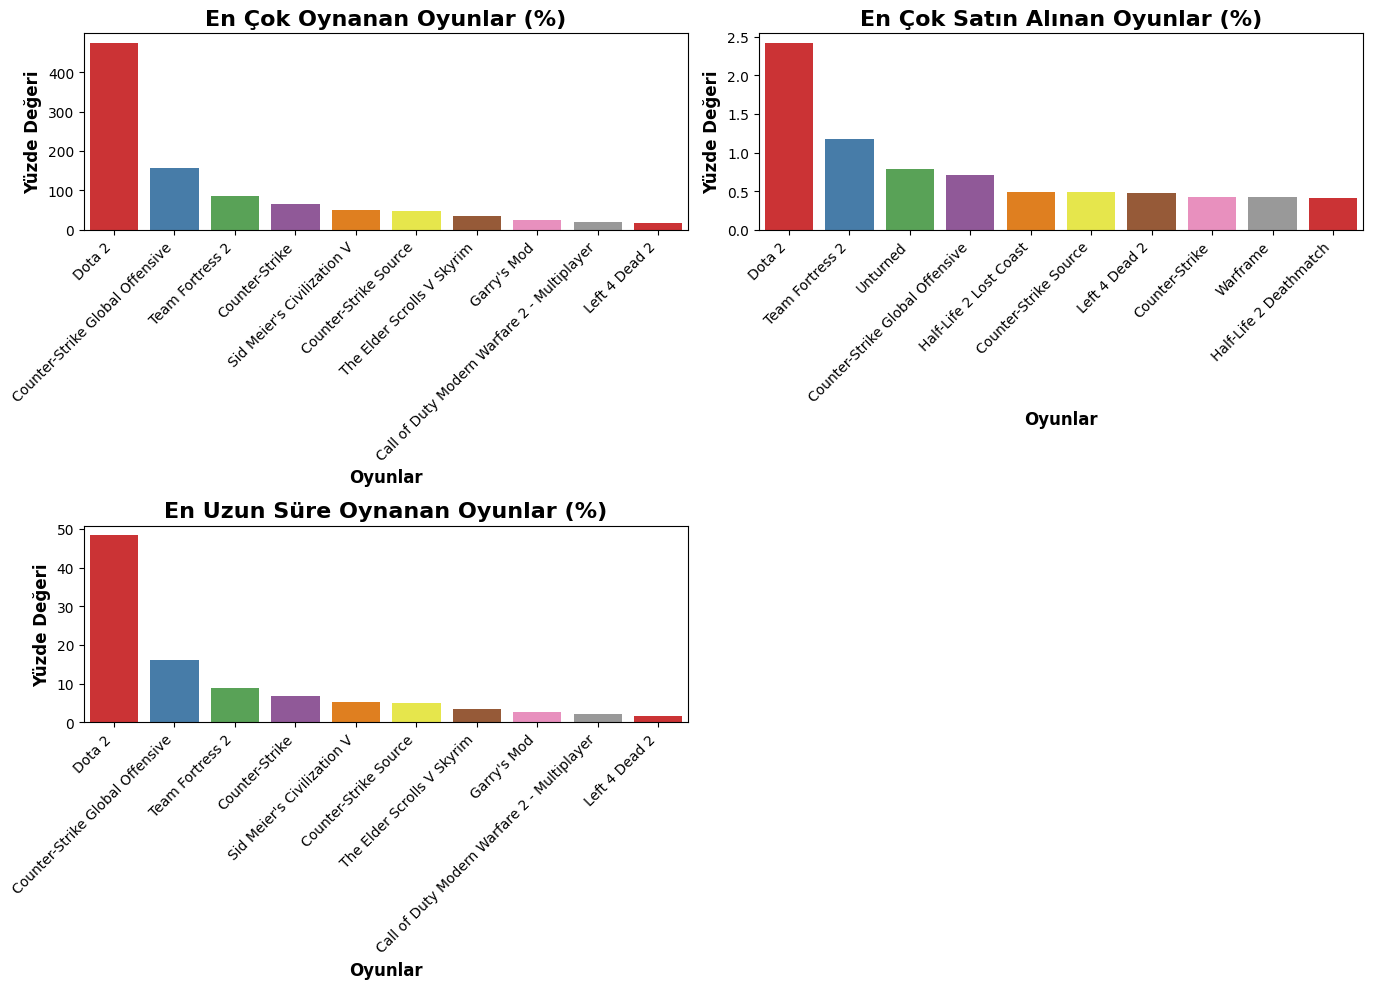

In [303]:
plt.figure(figsize=(14, 10))

# Oyunların en çok oynanma ve satın alınma bilgilerini hesapla
play_counts = df[df['Action'] == 'play'].groupby('Game')['Hours'].sum().nlargest(10)
purchase_counts = df[df['Action'] == 'purchase'].groupby('Game')['Game'].count().nlargest(10)
total_hours = df.groupby('Game')['Hours'].sum().nlargest(10)


total_actions = len(df)  

play_rate = play_counts / total_actions * 100
purchase_rate = purchase_counts / total_actions * 100
play_time_rate = total_hours / total_hours.sum() * 100

var_list = [play_rate, purchase_rate, play_time_rate]
titles = ['En Çok Oynanan Oyunlar (%)', 'En Çok Satın Alınan Oyunlar (%)', 'En Uzun Süre Oynanan Oyunlar (%)']

# Alt grafikler
for i in range(len(var_list)):
    plt.subplot(2, 2, i + 1)
    x = var_list[i].index
    y = var_list[i].values
    sns.barplot(x=x, y=y, palette='Set1')

    plt.title(titles[i], fontsize=16, fontweight='bold')
    plt.xlabel('Oyunlar', fontsize=12, fontweight='bold')
    plt.ylabel('Yüzde Değeri', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10) 
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


Bu grafik, en çok oynanan, en çok satın alınan ve en uzun süre oynanan oyunların yüzdesel dağılımlarını gösteriyor. İlk bakışta Dota 2, üç grafikte de bariz bir şekilde öne çıkıyor.

En Çok Oynanan Oyunlar (%):

Dota 2, diğer oyunlarla kıyaslandığında yüzdelik olarak en yüksek değere sahip. Bu durum, oyunun geniş bir oyuncu tabanına sahip olduğunu ve uzun süre oynandığını gösteriyor.
Counter-Strike: Global Offensive ve Team Fortress 2 gibi oyunlar da en çok oynananlar arasında.
En Çok Satın Alınan Oyunlar (%):

Bu kategoride, Dota 2 yine zirvede olsa da, Unturned ve Team Fortress 2 gibi oyunlar, satın alınma oranları açısından da dikkat çekici.
Satın alma oranları, genellikle oyunun fiyatlandırma stratejisi ve popülerliğine bağlı olarak değişiklik gösteriyor.
En Uzun Süre Oynanan Oyunlar (%):

Yine Dota 2 öne çıkıyor, bu da oyunun oyuncuların büyük bir kısmı tarafından uzun süre oynandığını ve oyuncuları kendine bağladığını gösteriyor.
Counter-Strike: Global Offensive, en uzun süre oynanan oyunlar arasında ikinci sırada.

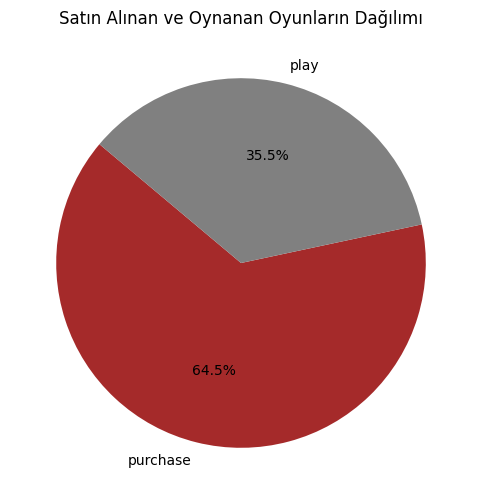

In [326]:
action_counts = df['Action'].value_counts()

pastel_colors = ['#a8dadc', '#ffb3b3'] 

plt.figure(figsize=(8, 6))
action_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['brown', 'grey'])
plt.title('Satın Alınan ve Oynanan Oyunların Dağılımı')
plt.ylabel('')  # Y eksenini kaldırma
plt.show()


Veri setimizdeki oyunların %35.5'i, kullanıcılar tarafından satın alınan oyunlar olarak sınıflandırılmaktadır. Geriye kalan %64.5'lik kısmı ise sadece oynanmış oyunlar olup, kullanıcılar tarafından satın alınmadan oynanmıştır. Bu, kullanıcıların çoğunlukla oyunları kiralama, deneme veya oyun içi özellikler (örneğin, ücretsiz deneme sürümleri) gibi yollarla kullandığını veya oyunları satın almadan erişim sağladığını gösteriyor olabilir.

**Satın Alınan Oyunlar:** Kullanıcıların oyunları satın alması, oyunların değerli veya uzun vadeli deneyim sağlayan içerikler sunduğunu gösterebilir. Bu oyunlar, genellikle kullanıcıların daha fazla zaman harcayacağı ve sürekli olarak erişim sağlamak isteyeceği türde olabilir.

**Oynanan Oyunlar:** Oynanan ancak satın alınmayan oyunlar, oyuncuların deneme amaçlı, kısa süreli veya belirli dönemlerde ilgi duyduğu oyunlar olabilir. Bu tür oyunlar, genellikle popüler oyunlar, deneme sürümleri ya da oyun içi satın alımlar sunan türlerde olabilir.

Kullanıcılar arasında satın alım ve oyun oynama arasındaki bu farklılık, pazarlama stratejileri için önemli bir veri olabilir. Örneğin, satın alınan oyunlar için daha fazla içerik ve güncelleme sunulabilirken, oynanan ancak satın alınmayan oyunlar için de kullanıcıları satın almaya teşvik etmek adına stratejiler geliştirilebilir.
Ayrıca, oyunların oynanma oranlarının yüksek olması, özellikle düşük bütçeli oyunlar veya indie oyunlar için fırsatlar yaratabilir. Bu tür oyunlar, daha geniş bir kitleye ulaşmak için daha fazla reklam ve tanıtım gerektirebilir.

> ### Korelasyon Analizi

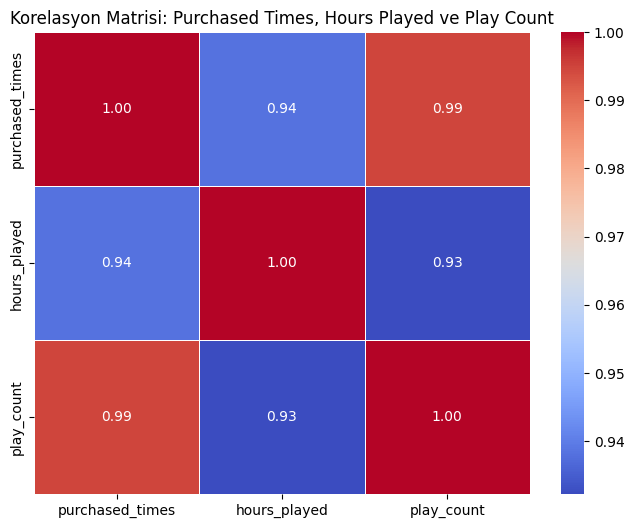

In [294]:
# Verileri birleştirelim
df_merged = pd.merge(purchased_times, play_count, on='game', how='left')
df_merged = pd.merge(df_merged, hours_played, on='game', how='left')

# Korelasyon matrisini hesaplayalım
corr_matrix = df_merged[['purchased_times', 'hours_played', 'play_count']].corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi: Purchased Times, Hours Played ve Play Count')
plt.show()



Bu analiz, oyunlar arasındaki satın alma, oynanma sayısı ve oynanma süresi arasındaki ilişkileri anlamamıza yardımcı oluyor. Play count (oynanma sayısı) ile purchase count (satın alma sayısı) arasındaki güçlü korelasyon (+0.99), bir oyunun daha fazla oynanması ile satın alma oranının yüksek olduğunu gösteriyor. Bu, popüler oyunların daha fazla satın alınıp daha fazla oynandığını ortaya koyuyor. Oyuncular, sevdikleri oyunları satın aldıktan sonra sürekli olarak oynamaya eğilimlidir.

Play count ile hours played (oynanma süresi) arasındaki korelasyonun +0.93 olması, bir oyunun ne kadar sık açıldıkça, o oyunda geçirilen toplam sürenin de o kadar arttığını gösteriyor. Bu, oyuncuların sıkça oynadıkları oyunlarda uzun süreler geçirdiğini ve bu oyunların uzun vadeli ilgi uyandırdığını işaret ediyor.

Son olarak, purchase count (satın alma sayısı) ile hours played (oynanma süresi) arasındaki +0.94 korelasyon, oyun satın alma oranının da oynama süresiyle güçlü bir ilişkisi olduğunu gösteriyor. Bu ilişki, oyuncuların satın aldıkları oyunları daha uzun süre oynama eğiliminde olduklarını gösteriyor. Ancak, bazı oyunların daha fazla satın alınmasına rağmen, oyuncuların onlarda fazla zaman geçirmemesi mümkündür; bu durum, oyunların ilgi çekici olma düzeyine bağlı olarak farklılık gösterebilir.

> ### Oynanma Sayısı ve Satın Alma arasındaki ilişki

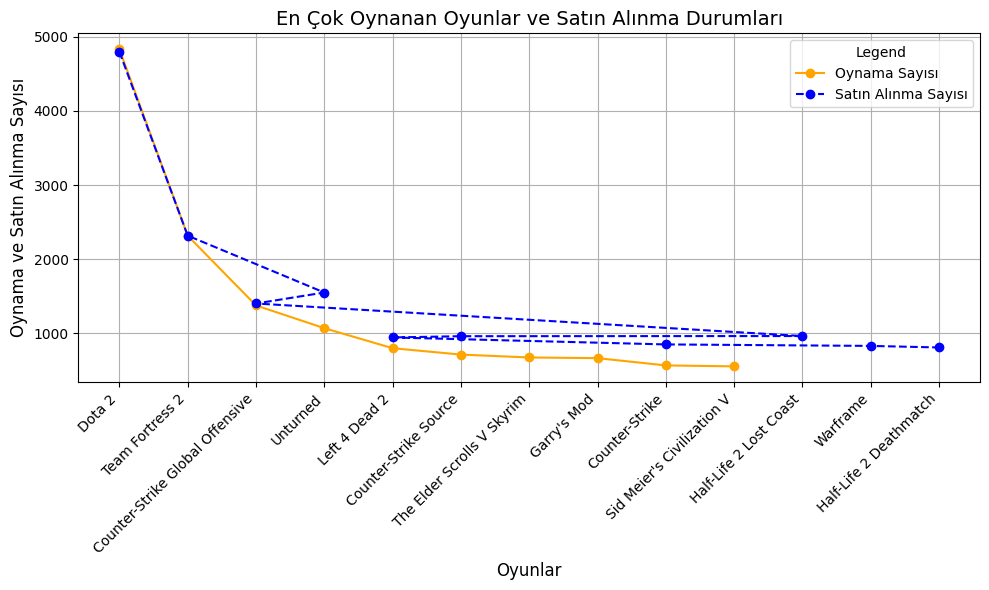

In [310]:
fig, ax = plt.subplots(figsize=(10, 6))

# Oynama sayısı için çizgi
ax.plot(play_count['game'], play_count['play_count'], '-o', label='Oynama Sayısı', c='orange')

# Satın alma sayısı için çizgi
ax.plot(purchased_times['game'], purchased_times['purchased_times'], '--o', label='Satın Alınma Sayısı', c='blue')

# Eksen etiketleri ve başlık
ax.set_title('En Çok Oynanan Oyunlar ve Satın Alınma Durumları', fontsize=14)
ax.set_xlabel('Oyunlar', fontsize=12)
ax.set_ylabel('Oynama ve Satın Alınma Sayısı', fontsize=12)

# Grid, legend ve stili düzenleme
ax.grid(True)
plt.xticks(rotation=45, ha='right')  # Oyun isimlerinin kolayca okunabilmesi için rotalama
plt.legend(title='Legend')

# Grafik gösterimi
plt.tight_layout()
plt.show()


Bu grafikte, en popüler oyunlar oynanma ve satın alma sayısına göre sıralanmış. Dota 2 ve Team Fortress 2, hem oynanma hem de satın alınma oranlarında diğer oyunlardan açık ara önde görünüyor. Bu, bu oyunların geniş bir kitle tarafından ilgi gördüğünü ve popülerliğinin yüksek olduğunu gösteriyor. Özellikle Dota 2, oynanma açısından en üst sırada yer alıyor, bu da oyunun ücretsiz olarak oynanabilmesi ve büyük bir topluluğa sahip olmasından kaynaklanabilir.

Dikkat çeken bir nokta, oyunların satın alma ve oynanma oranları arasında belirgin bir ilişki olmadığı. Örneğin, Counter-Strike: Global Offensive ve The Elder Scrolls V: Skyrim gibi bazı oyunlar, oynanma oranlarında yüksek, ancak satın alma sayılarında daha düşük bir seviyede kalıyor. Bu durum, bazı oyunların oynanma oranlarının, sahip oldukları fiyat politikası, oyun içi içerikler veya çok oyunculu modlar gibi faktörlerden etkilendiğini gösteriyor.

> ### Popülerlik Karşılaştırması

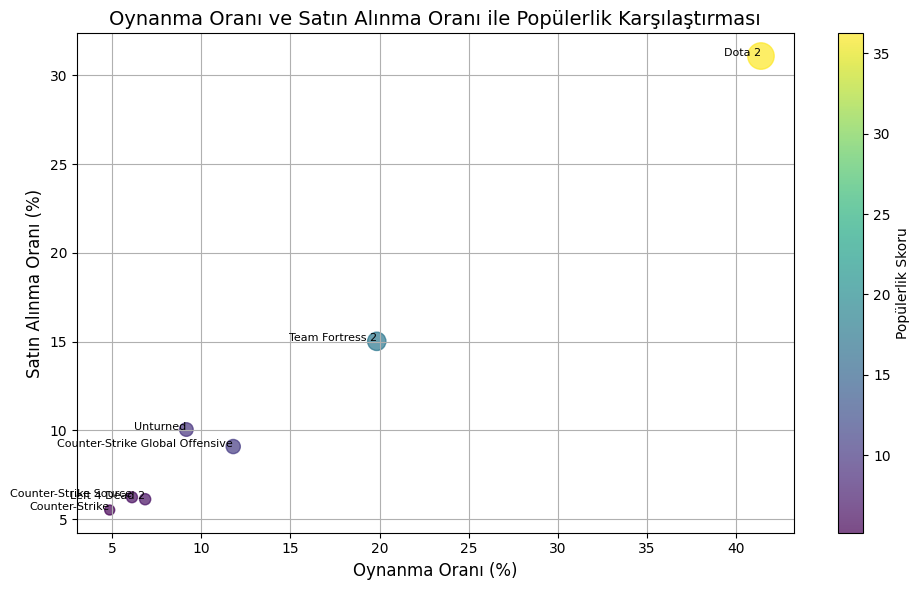

In [292]:
# Popülerlik skoru hesaplama
# Oynama, satın alma ve oynama süresi sayıları
total_play_count = df[df['Action'] == 'play'].groupby('Game').size()
total_purchase_count = df[df['Action'] == 'purchase'].groupby('Game').size()
total_play_time = df[df['Action'] == 'play'].groupby('Game')['Time'].sum()  # Oynama süresi

# Yüzdelik oranları hesaplayalım
total_actions = len(df)  # Toplam veri sayısı
play_rate = total_play_count / total_actions * 100
purchase_rate = total_purchase_count / total_actions * 100
play_time_rate = total_play_time / total_play_time.sum() * 100  # Oynama süresi oranı

# Oranları dataframe'e ekleyelim
df_merged = pd.DataFrame({
    'play_rate': play_rate,
    'purchase_rate': purchase_rate,
    'play_time_rate': play_time_rate
}).fillna(0)

# En çok oynanan ve satın alınan oyunları sıralayalım
df_merged['popularity'] = (df_merged['play_rate'] + df_merged['purchase_rate'] + df_merged['play_time_rate']) / 3
df_merged = df_merged.sort_values('popularity', ascending=False)

# Grafik oluşturma (Bubble Chart)
plt.figure(figsize=(10, 6))

# Bubble chart
scatter = plt.scatter(df_merged['play_rate'], df_merged['purchase_rate'], 
                      s=df_merged['popularity']*10, # Bubble size based on popularity score
                      c=df_merged['popularity'], cmap='viridis', alpha=0.7)

# Oyun isimlerini ekleme
for i in range(len(df_merged)):
    plt.text(df_merged['play_rate'].iloc[i], df_merged['purchase_rate'].iloc[i], 
             df_merged['game'].iloc[i], fontsize=8, ha='right')

# Başlık ve etiketler
plt.title('Oynanma Oranı ve Satın Alınma Oranı ile Popülerlik Karşılaştırması', fontsize=14)
plt.xlabel('Oynanma Oranı (%)', fontsize=12)
plt.ylabel('Satın Alınma Oranı (%)', fontsize=12)

# Renk bar
plt.colorbar(label='Popülerlik Skoru')

plt.grid(True)
plt.tight_layout()
plt.show()


Bu grafik, oyunların oynanma oranı ile satın alınma oranları arasındaki ilişkiyi ve popülerlik puanını gösteriyor. Renkli baloncuklar, oyunların popülerlik puanına göre boyutlandırılmış.

**Dota 2**, grafikte en üst sağ köşede yer alıyor ve bu, oyunun yüksek oynanma ve satın alma oranlarına sahip olduğunu gösteriyor. Bu oyun, popülerlik puanı olarak da oldukça yüksek bir seviyede, bu yüzden büyük ve parlak sarı bir baloncukla gösterilmiş.
**Team Fortress 2**, oynanma oranı yüksek, ancak satın alma oranı Dota 2'ye kıyasla daha düşük. Bu oyun, yine de oyuncu kitlesi tarafından oldukça sevildiği için popülerlik sıralamasında üst sıralarda yer alıyor.
**Counter-Strike**: Source ve Counter-Strike: Global Offensive, düşük oynanma ve satın alma oranlarına sahip olmalarına rağmen, belirli bir oyuncu kitlesine hitap ettiği için popülerliklerini koruyorlar. Bu oyunlar, daha küçük ve koyu renkli baloncuklarla temsil edilmiş.
**Unturned**, oynanma oranında belirgin bir artış gösteriyor ancak satın alınma oranı nispeten düşük. Bu, oyunun ücretsiz olmasının ve topluluk tarafından ilgi görmesinin bir göstergesi olabilir.
Genel olarak, oyunların popülerliği, yalnızca oynanma ve satın alınma oranlarıyla değil, aynı zamanda oyuncu sadakati ve oyun içi içeriklerin kalitesi gibi faktörlerle de şekilleniyor.

# Genel Çıkarım

Veri setinde yapılan analiz, popüler oyunların satış ve oynanma oranlarının yanı sıra, oyuncu davranışlarını ve oyunların oyuncu üzerinde yarattığı etkiyi anlamamıza önemli ipuçları veriyor. Özellikle Dota 2, Team Fortress 2 ve Counter-Strike gibi oyunların grafikteki öncelikli konumu, oyunların hem uzun süre oynandığını hem de geniş bir oyuncu kitlesi tarafından satın alındığını gösteriyor. Dota 2’nin özellikle açık ara lider olması, oyunun sadece popülerliğini değil, aynı zamanda oyunculara bağımlılık yaratma kapasitesini de ortaya koyuyor. Bu bağlamda, oyunların "play count" (oynanma sayısı) ve "purchase count" (satın alma sayısı) arasındaki güçlü ilişki (+0.99) de dikkat çekiyor. Bu durum, oyunların popülaritesinin, oyuncular tarafından satın alınıp uzun süre oynanmasıyla doğrudan bir ilişki içinde olduğunu gösteriyor. Yani, sık oynanan oyunlar genellikle daha fazla satın alınıyor ve oyuncular, sevdikleri oyunları sürekli oynama eğilimindeler.

Ayrıca, Free-to-Play (ücretsiz oyun) modelinin etkisi de gözlemleniyor. Özellikle Team Fortress 2 ve Unturned gibi oyunlar, ücretsiz olmasına rağmen yüksek satın alım oranlarıyla dikkat çekiyor. Bu durum, oyun içi satın alımlar ve DLC (indirilebilir içerik) gibi ek gelir modellerinin, bir oyunun finansal başarısını nasıl artırabileceğini gösteriyor. Ücretsiz oyunların sağladığı erişilebilirlik, oyuncu kitlesinin büyümesine ve bu oyunların uzun süre oynanmasına olanak tanırken, oyun içi satın alımlar ise geliştiricilerin bu oyunları karlı hale getirmesini sağlıyor.

Grafikte dikkat çeken bir diğer önemli nokta ise satın alınan oyunlar ile oynanma süreleri arasındaki ilişki. Yüksek satın alım sayısına sahip oyunlar, genellikle oyuncular tarafından daha uzun süre oynanıyor ve bu da oyunların kalıcı bir popülerlik kazandığını gösteriyor. Örneğin, Counter-Strike: Global Offensive ve The Elder Scrolls V: Skyrim gibi oyunlar, uzun süreli oynanma süresi ile dikkat çekerken, satın alım oranları daha düşük seviyelerde kalabiliyor. Bu durum, oyuncuların bazı oyunları ücretsiz deneyip daha sonra satın almak yerine, yalnızca belirli içerikler veya özellikler için harcama yapmayı tercih ettiklerini gösteriyor.

Makine öğrenmesi açısından, bu verilerin pek çok farklı analiz ve modelleme için kullanılabileceğini söyleyebiliriz. Oyunların satış ve oynanma oranları arasındaki korelasyon, kullanıcıların hangi oyunları tercih edeceğini tahmin etmek için sınıflandırma modelleri kurmaya olanak tanır. Özellikle satın alım tahminleri veya oyun oynama süresi tahmin modelleri gibi algoritmalar geliştirmek, oyun geliştiricilerinin oyuncu davranışlarını daha iyi anlamalarına yardımcı olabilir. Bu tür modeller, oyuncu tercihlerini analiz ederek kişiselleştirilmiş önerilerde bulunabilir ya da oyunların gelişiminde hangi özelliklerin daha popüler olduğunu belirlemek için kullanılabilir.

Ayrıca, satın alım ve oynanma davranışlarını birleştiren çoklu regresyon analizleri ya da kümelenme algoritmaları, oyuncu segmentasyonunu daha iyi yapmamıza olanak tanır. Örneğin, oyuncuları sadece oynanma oranlarına göre değil, aynı zamanda satın alma ve oyun içi etkileşimlerine göre de sınıflandırarak, farklı oyuncu gruplarına hitap eden stratejiler geliştirebiliriz. Bu tür analizler, oyunların daha geniş bir kitleye ulaşabilmesi ve karlılığının artırılması adına önemli veriler sunar.

Sonuç olarak, bu veri seti, oyunların hem ekonomik başarısını hem de oyuncu kitlesinin dinamiklerini anlamak için önemli bir araçtır. Makine öğrenmesi ve veri bilimi yöntemleriyle, oyunların popülerliğini, satın alınma ve oynanma sürelerini daha iyi tahmin edebilir, oyuncu davranışlarına dayalı stratejiler geliştirebiliriz. Bu tür analizler, oyun geliştiricileri için daha verimli kararlar alınmasını sağlayabilir ve oyuncu deneyimini iyileştirmek adına önemli bilgiler sunar.